In [ ]:
##### 1. 나이브 베이즈 분류 - Naive Bayes Classification (p437)

# 대체로 매우 높은 차원의 데이터세트에 적합한 상당히 빠르고 간단한 분류 알고리즘
# 매우 빠르고 조정 가능한 모수가 매우 적기 때문에 분류 문제에서 간편한 기준선으로 쓰기에 매우 유용하다

In [ ]:
######################################################################################################################################

In [1]:
### 베이즈 분류

# 베이즈 분류에서는 관측된 특징(feature)이 주여졌을 때 레이블(label)의 확률을 구하는데 관심이 있으며, 이를 P(L|features)로 쓴다.
# P(L|features) = P(features|L)*P(L) / P(features)

# L1과 L2라는 두 label 사이에서 결정하려고 하는 경우, 사후 확률의 비율을 계산해 결정을 내릴 수 있다.
# P(L1|features)/P(L2|features) = P(features|L1)*P(L1) / P(features|L2)*P(L2)
# 이제 여기서 필요한 것은 각 label에 대한 P(features|Li)를 계산할 수 있는 모델(생성모델 : generative model)이 필요하다.
# 이 생성모델을 지정하는 것이 베이즈분류기를 훈련시키는 주요한 부분이다.
# 그러한 일반적인 형태의 훈련 단계는 매우 어려운 작업이지만, but 이 모델의 형태에 대한 단순한 가정을 사용해 간단히 만들 수 있다.
# 이 떄문에 'naive'라는 표현이 쓰인 것이다. 생성모델에 대해 naive하게 가정하면 생성모델을 대략 근사하게 찾을수 있게 된다.

# 표준 import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
######################################################################################################################################

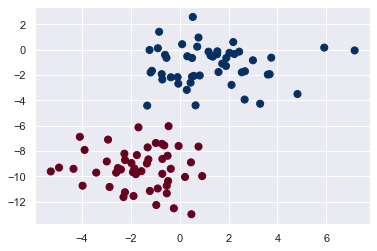

In [2]:
### (1) 가우스 나이브 베이즈 (Gaussian naive Bayes) (p438)
# 이 분류기는 각 label의 데이터가 간단한 가우스 분포로부터 추출된다고 가정한다.

# 가우스 나이브 베이즈 분류를 위한 데이터
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

# 간단한 모델을 만드는 가장 빠른 방법은 데이터가 공분산이 없는 정규분포를 따른다고 가정하는 것이다.
#  => 이 모델은 단순하게 각 레이블 내 점의 평균과 표준편차를 구함으로써 적합할 수 있다. 단순히 이런 분포를 정의하기만 하면 된다.
# 각 클래스에 대해 이 생성 모델이 준비되면 모든 데이터 점에 대한 우도 P(features|L1)을 계산할 수 있는 간단한 방법이 생긴 셈이니
# 이로부터 사후 확률을 계산해서 주어진 점에 대해 어느 레이블이 가장 확률이 높은지 결정할 수 있다.

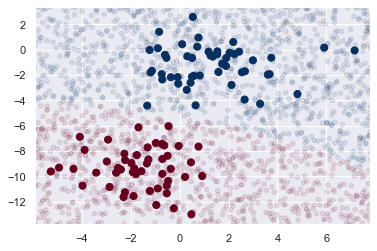

In [3]:
# 위의 절차를 구현
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

# 새로운 데이터를 생성하여 레이블을 예측
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

# 데이터를 plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [4]:
# 베이즈 형식주의의 좋은 점은 자연스럽게 확률적인 분류가 가능하다는 것이다.
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)
# 두 열은 각각 첫번째와 두번째 레이블의 사후 확률을 제공한다.
# 분류 작업의 불확실성의 추정치를 알고 싶다면, 이와 같은 베이즈 방식이 유용할 수 있다.(because 사후 확률을 제시하면 되니까)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
######################################################################################################################################

In [ ]:
### (2) 다항분포 나이브 베이즈 (p441)

# 위에서의 가우스 가정이 각 레이블에 대한 생성 분포를 지정하는 데 사용할 수 있는 유일한 가정은 아니다
# 다른 예는 다항분포 나이브 베이즈로, 특징이 간단한 다항분포로부터 생성된다고 가정한다.
# 다항분포는 여러 범주에서 관측한 counts의 확률을 나타내므로, counts나 counts의 비율을 나타내는 특징에 가장 적절하다.
# 다항분포 나이브 베이즈가 자주 사용되는 분야 중 하나는 텍스트 분류이다.

In [5]:
# 데이터를 다운로드하고 대상 이름을 살펴보기

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# 여기서는 간단하게 이 범주 중 몇가지만 선택해서 다운로드 할 것임.

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [7]:
# 데이터 예시

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [10]:
# 머신러닝에 이 데이터를 사용하기 위해서는 각 문자열의 콘텐츠를 숫자 벡터로 전환할 수 있어야 한다.
# 이를 위해 TF-IDF 벡터 변환 프로그램을 사용하고 그것을 다항분포 나이브 베이즈 분류기에 덧붙이는 파이프라인을 만든다.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
# 이 파이프라인으로 모델을 train데이터에 적용하고, test데이터에 대한 레이블을 예측할 수 있다

model.fit(train.data, train.target)
labels = model.predict(test.data)

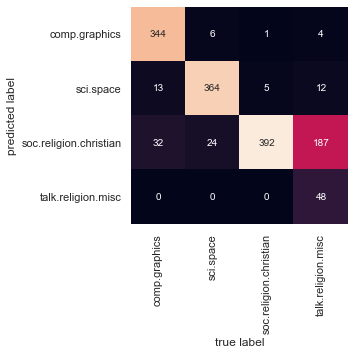

In [12]:
# 이제 그 레이블을 평가해 분류기의 성능을 알아볼 수 있다.
# 아래는 test데이터에 대한 실제 레이블과 예측한 레이블의 오차 행렬을 보여준다,

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 이 간단한 분류기로도 상당히 잘 구분한다는 것을 확인할 수 있다.

In [14]:
# 파이프라인의 predict()메서드를 사용해 어떤 문자열에 대해서도 범주를 결정할 수 있다.

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [16]:
print(predict_category('sending a payload to the ISS'))
print(predict_category('discussing islam vs atheism'))
print(predict_category('determining the screen resolution'))

sci.space
soc.religion.christian
comp.graphics


In [ ]:
######################################################################################################################################

In [ ]:
### 언제 나이브 베이즈 모델을 사용할 것인가? (p444)

# 나이브 베이즈 분류기는 수행능력이 뛰어나지 않지만, 여러 이점이 있다
# 훈련과 예측이 빠르고, 간단하고, 해석이 쉽고, 조정 가능한 모수가 적다는 점이다.
# 이러한 이점은 나이브 베이즈 분류기가 초기 기초 분류 작업을 하는 데 사용하기 좋다는 것을 의미한다.
# 특히, 차원이 증가할수록 나이브 베이즈 같은 간단한 분류기가 잘 동작하고 더 복잡한 분류기보다 더 잘 동작하기도 한다.

In [ ]:
######################################################################################################################################

In [17]:
##### 2. 선형 회귀 (p445)

# 나이브 베이즈가 분류 작업을 위한 좋은 시작점인 것 처럼, 선형 회귀 모델은 회귀 작업의 좋은 시작점이다.

# 표준 import
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
######################################################################################################################################

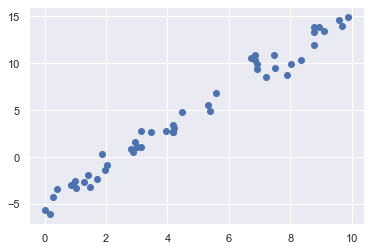

In [19]:
### (1) 단순 선형 회귀

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


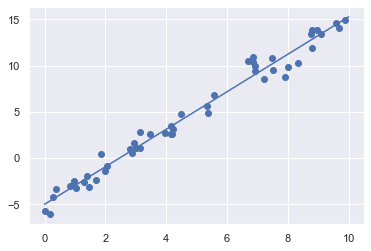

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [22]:
# 다차원 선형 회귀도 가능하다 
# numpy의 행렬 곱셈 연산자를 이용해 예제 데이터를 만들어 실제 이러한 적합 중 하나를 할 수 있다.

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


In [ ]:
######################################################################################################################################

In [ ]:
### (2) 기저 함수 회귀 (p448)

# 선형 회귀를 변수들 사이의 비선형 관계에 적응시키는 데 사용할 수 있는 방법은 데이터를 기저 함수(basis function)에 따라 변환하는 것이다

In [23]:
## 다항식 기저 함수

# 변환기가 1차원 배열을 각 값의 지수를 취해 3차원 배열로 변환한 것을 확인할 수 있다.
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [24]:
# 7차 다항식 모델을 파이프라인을 사용해 위 방식으로 만듬

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

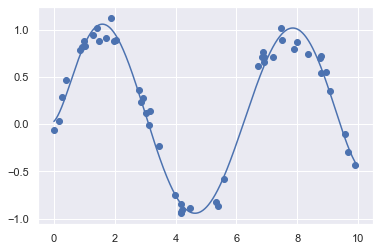

In [25]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

# 7차 다항식 기저함수를 사용함으로써 선형 모델이 이 비선형 데이터에 훌륭하게 적합될 수 있다.

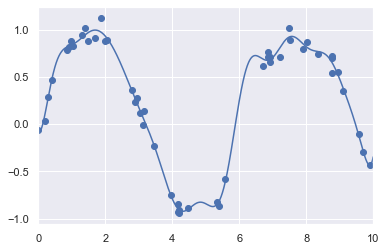

In [26]:
## 가우스 기저 함수

# 다항식 기저 함수의 합이 아닌 가우스 기저 함수의 합인 모델을 적합할 수도 있다.
# 이 가우스 기저 함수는 sckit-learn에 내장돼 있지 않지만, 아래 코드로 작성할 수 있다.

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """1차원 입력에 대해 균일한 간격을 가지는 가우시안 특징"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # 데이터 범위를 따라 펼쳐진 N개의 중앙점 생성
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [ ]:
######################################################################################################################################

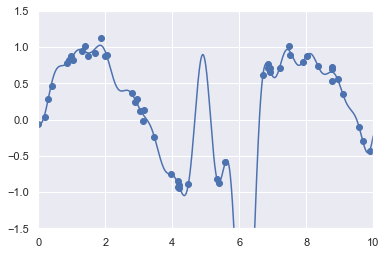

In [27]:
# 정규화
# 기저 함수를 선형 회귀에 도입하면 모델이 훨씬 더 유연해지만 과적합 될 위험이 있다.
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);
# 지나치게 복잡한 기저 함수 모델은 데이터를 과적합 한다.

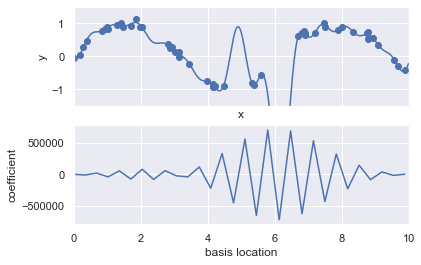

In [28]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

# 아래 그래프는 coef를 나타낸건데, 진폭이 엄청 크게 나타난다.
# 이유는 인접한 기저 함수의 계수가 부풀려져 서로를 상쇄하기 때문이다.
# 따라서, 모델 모수의 값이 큰 경우 패널티를 줘서 이런 현상을 제한할 수 있으면 좋을 것이다.
# 여기서, 이러한 패널티를(regularization)이라고 하며, regularization은 여러 형태를 가질 수 있다.

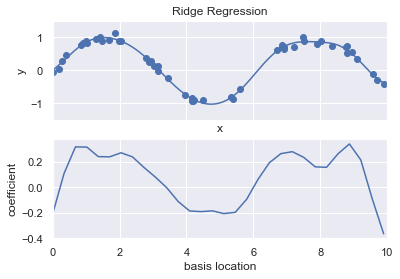

In [29]:
## 능선 회귀 (L2 정규화, ridge regression) (티호노프 정규화, Tikhonov regularization)
# 모델 계수의 제곱(2-norms)의 합에 패널티를 부과한다.

from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))  # alpha는 패널티의 강도를 제어하는 자유 모수
basis_plot(model, title='Ridge Regression')

# alpha가 0일때 표준 선형 회귀 결과로 돌아가고
# alpha가 무한대로 갈때 모든 모델 응답이 억제된다.

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870486668, tolerance: 0.002065280097246271
  positive)


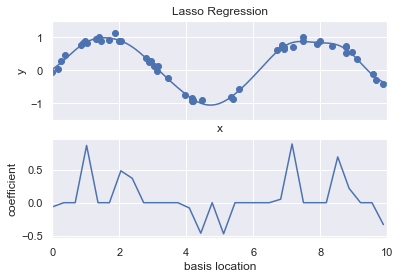

In [31]:
## 라쏘 정규화(L1)
# 회귀 계수의 절대값(1-norms)의 합에 패널티를 부과한다.
# 라쏘 회귀는 기하학적 이유로 가능하다면 sparse한 모델을 선호하는 경향이 있다.
# 즉, 이방식은 우선적으로 모델 계수를 정확히 0으로 설정한다.

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

In [ ]:
######################################################################################################################################

In [1]:
##### (3) 서포트 벡터 머신 (p462)

# SVM은 분류와 회귀 분석에 모두 사용할 수 있는 특히 강력하고 유연한 supervised learning algorithm이다
# 표준 import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

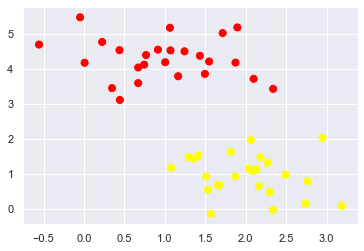

In [2]:
# 판별 분류(discriminative classification)
# : 각 클래스를 모델링하기보다는 간단히 클래스를 서로 나누는 선이나 곡선(2차원), 다양체(다차원)를 구할 것이다.
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

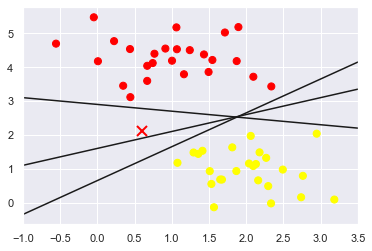

In [3]:
# 위 예제에 대한 구분선 그리기
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

# X점은 선을 어떻게 나누냐에 따라 클래스가 달라진다.
# 따라서, 단순히 선을 그리는 것만으로는 충분하지 않고, 마진을 통해 이걸 해결한다.

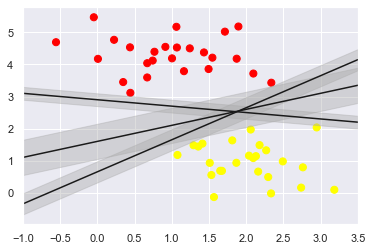

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [7]:
# SVM 적합하기
# 당분간 선형 커널을 사용하고 모수 C에 매우 큰 수를 설정할 것이다.
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

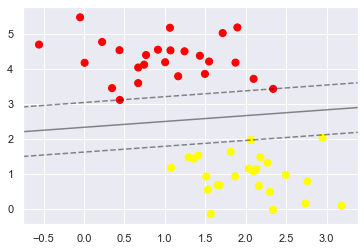

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """2차원 SVC를 위한 의사결정 함수 플로팅하기"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 평가를 위한 그리드 생성
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 의사결정 경계와 마진 plotting
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    
    # 서포트 벡터 플로팅
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [10]:
# scikit-learn에서 마진에 닿아있는 점들의 정체는 분류기의 support_vectors_ 속성에 저장돼 있다,
model.support_vectors_

# 이 분류기가 성공할 수 있었던 핵심은 적합에서 오직 서포트 벡터의 위치만 중요하게 여긴다는 점이다
# 즉, 마진으로부터 멀리 떨어진 점들은 적합을 변경하지 않는다.
# 이 떨어진 점들은 loss function에 기여하지 않기 때문에 그것들의 위치나 개수는 중요하지 않다.
# support vector가 동일하다면 n=60개로 학습한 모델이나, n=120개로 학습한 모델이나 모델은 같다.

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

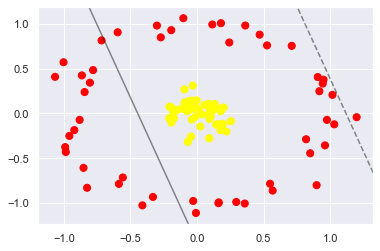

In [12]:
### 커널 svm
# svm은 커널과 결합할 때 막강해진다. 특히, 선형적으로 분리되지 않는 데이터에서!
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [19]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits import mplot3d

r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


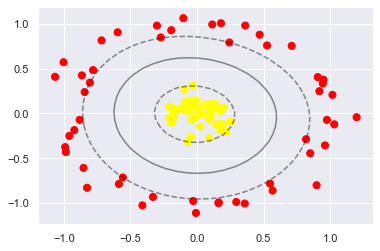

In [20]:
# 위에서의 핵심은 사영을 선택하고 신중하게 조정하는 것이다. 만일 radial basis function의 중앙을 정확히 맞추지 않으면 이처럼 분리될 수 없다
# 이 목적을 달성하기 위한 전략은, 모든 데이터세트 점에 중심을 둔 basis function을 계산해서 svm이 그 결과를 추려내게 하는 것이다.
# 이러한 유형의 basis function 변환을 kernel transformation이라고 한다.
# 하지만, N이 커질수록 계산량이 늘어나는 문제점이 있어 보인다.
# 그러나, kernel trick(커널 기법)으로 알려진 절차 때문에, N차원 표현을 전부 구성하지 않고 암묵적으로 커널 변환된 데이터에 적합시킬 수 있다
# 이 kernel trick은 svm에 내장돼 있으며 svm 방식이 매우 막강한 이유 중 하나이다.

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

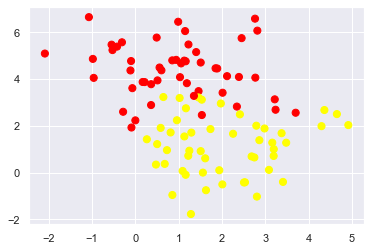

In [21]:
### soft margin : 데이터가 어느정도 겹치는 상황일 때 어떻게 할까?의 해답

# 점 일부가 마진에 들어가는 것을 허용하는 것이다.
# 조정모수 C가 매우 크면 마진이 단단해 점들이 그 안에 존재할 수 없다.

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

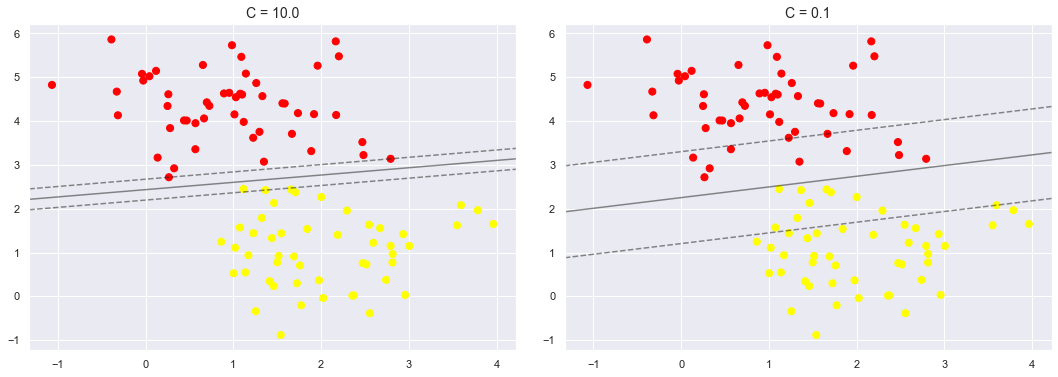

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    
# 모수 C의 최적값은 데이터세트에 따라 다르며 교차 검증이나 이와 유사한 절차를 통해 조정해야 한다

In [ ]:
### 특징 정리

# 서포트벡터머신은 비교적 적은 수의 서포트 벡터에 의존하기 때문에 매우 간결한 모델이며, 매우 적은 메모리를 사용한다
# 모델이 훈련되고 나면 예측 단계가 매우 빨리 수행된다
# 고차원 데이터에서 잘 동작한다.
# 커널 메서드와 통합하면 여러 유형의 데이터에 적응시킬 수 있어서 다양한 용도로 사용할 수 있다.

# 표본이 커질경우 모델의 복잡도가 너무 커진다. (상대적으로 적은 표본에서, 고차원 데이터에서 잘 작동하는듯?)
# C를 어떤걸 선택하느냐에 따라 결과가 전적으로 달라진다 -> 이 값은 교차 검증을 통해 신중하게 선택해야 한다.
# 결과에 대해 직접적으로 확률적 해석을 할 수 없다. 이는 내부 교차 검증을 통해 추정할 수 있지만, 많은 비용이 발생한다.

In [2]:
##### (4) 의사결정나무와 랜덤 포레스트 (p478)

# 랜덤 포레스트라는 비모수 알고리즘은 의사결정 트리를 기반으로 한 앙상블 학습 방법의 한 예다.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

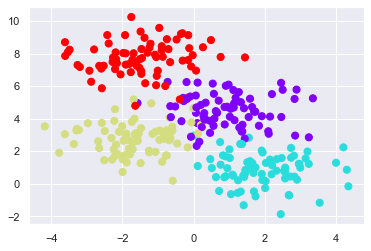

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


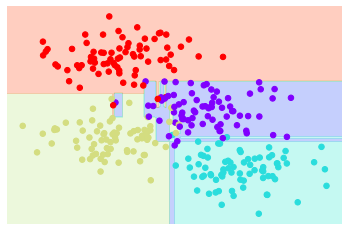

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
visualize_classifier(DecisionTreeClassifier(), X, y)

In [ ]:
# 깊이가 깊어질수록 매우 이상한 모양을 가진 분류 영역이 만들어지는 경향이 있다. => 과적합
# 이러한 과적합은 의사결정 트리의 일반적인 특성이다.
# 이러한 과적합을 확인할 수 있는 또 다른 방법은 데이터의 서로 다른 부분집합에 대해 훈련된 모델을 살펴보는 것이다.
# ex) 원본 데이터를 반으로 나누어 두 개의 다른 트리를 훈련시킨다.
# 두 개의 트리가 다른 분류 결과를 내놓는 영역이 있을 것이다. 이것으로부터 더 나은 결과를 얻을 수 있다
# 두 개의 트리로부터 얻은 정보를 이용해 결과를 개선한 것처럼, 많은 트리에서 얻은 정보를 사용하면 결과를 더 많이 개선할 수 있따.

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


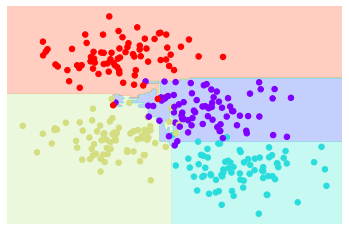

In [10]:
### 랜덤 포레스트
# 배깅(bagging) : 여러 과적합 추정 모델을 결합해서, 이 과적합의 효과를 줄일수 있다는 개념
# Randomized decision trees의 ensemble을 random forest라고 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

# 이 예제에서는 training데이터의 80%에 해당하는 임의의 부분집합으로 각 추정기를 적합시켜서 데이터를 임의화(randomized)했다.
# 실제로 의사결정 트리는 분할을 선택한느 방식에 우연성이 주입될 때 더 효과적으로 randomized된다.
# 이렇게 하면 모든 데이터가 매번 적합에 기여하지만, 적합의 결과는 여전히 원하던 임의성을 갖게 된다.

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


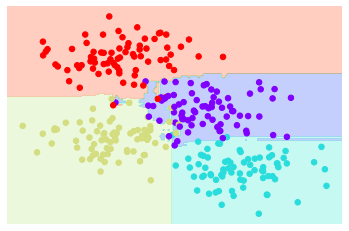

In [11]:
# scikit learn에서 이런 임의화된 의사결정 트리의 최적화된 앙상블은 RandomForestClassifier 추정기에 구현돼 있고 임의화가 자동으로 이루어진다
# 추정기의 개수만 선택하면 매우 빠르게 트리의 앙상블을 적합시킨다

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

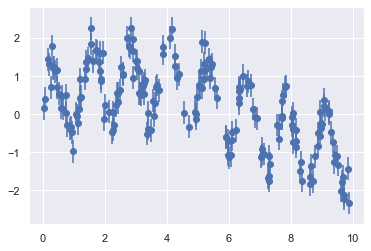

In [12]:
### 랜덤 포레스트 회귀
# 랜덤포레스트는 회귀분석에도 사용할 수 있다.
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

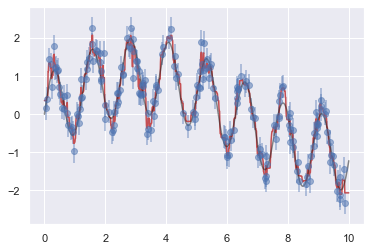

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [ ]:
### 랜덤포레스트 정리

# 기반 의사결정트리가 매우 단순해서 훈련과 예측이 모두 빠르다.
# 각 트리가 완전히 독립적인 요소이기 때문에 두 작업 모두 간단하게 병렬 처리할 수 있다.
# 여러개의 트리를 사용해 확률적 분류가 가능하다. 추정기로부터 얻은 가장 많은 수의 표가 확률 추정치를 제공한다.
# 비모수 모델은 매우 유연하기 때문에 다른 추정기에서 과소적합된 작업에도 잘 동작할 수 있다

# 단점은 결과를 쉽게 해석할 수 없다는 것이다
# 즉, 분류 모델의 의미에 대한 결론을 도출해야 한다면 랜덤 포레스트를 선택하는 것은 바람직하지 않다.